In [1]:
import torch
import random
import pandas as pd
import numpy as np
d1=[]
d2=[]
d3=[]
d4=[]

for i in range(5000):
    x=float(random.uniform(0,1))
    d1.append(x)
    y=float(random.uniform(0,1))
    d2.append(y)
    z=float(random.uniform(0,1))
    d3.append(z)
    d4.append(float(2*x+3*y+z))
df=pd.DataFrame({'x1':d1,'x2':d2,'x3':d3,'x4':d4},index=range(0,5000))


In [2]:
max_1=sorted(list(df.max()))[-1]


In [3]:
df_1 = df/max_1

In [4]:
X = df_1.iloc[:,0:3]
Y = df_1.iloc[:,3]

In [5]:
Y.shape

(5000,)

In [6]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
%matplotlib inline
print("Using PyTorch Version %s" %torch.__version__)

Using PyTorch Version 1.2.0


In [7]:
np.random.seed(0)
torch.manual_seed(0)

# Split into test and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
    test_size=0.25, random_state=73)

In [8]:
# Define network dimensions
n_input_dim = X_train.shape[1]
# Layer size
n_hidden = 4 # Number of hidden nodes
n_output = 1 # Number of output nodes = for binary classifier

# Build your network
net = nn.Sequential(
    nn.Linear(n_input_dim, n_hidden),
    nn.ELU(),
    nn.Linear(n_hidden, n_output),
    nn.Sigmoid())
    
print(net)

Sequential(
  (0): Linear(in_features=3, out_features=4, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=4, out_features=1, bias=True)
  (3): Sigmoid()
)


In [9]:
loss_func = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

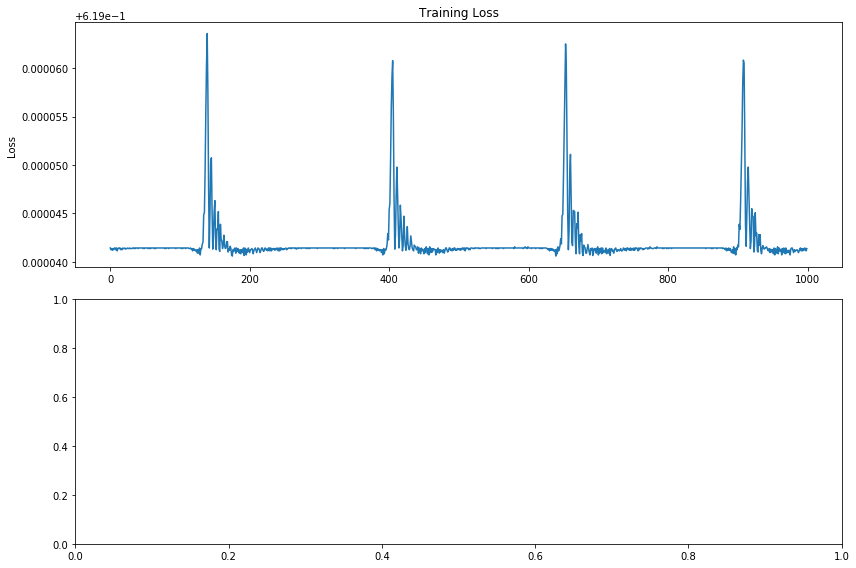

In [11]:
train_loss = []
train_accuracy = []
iters = 1000
Y_train_t = torch.from_numpy(Y_train.values)
for i in range(iters):
    X_train_t = torch.from_numpy(X_train.values)
    y_hat = net(X_train_t.float())
    loss = loss_func(y_hat, Y_train_t.float())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    train_loss.append(loss.item())
    
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(train_loss)
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')

plt.tight_layout()
plt.show()

In [12]:
X_test_t = torch.from_numpy(X_test.values)
y_hat_test = net(X_test_t.float())

In [13]:
y_hat_test

tensor([[0.4003],
        [0.2715],
        [0.6831],
        ...,
        [0.8402],
        [0.7567],
        [0.4174]], grad_fn=<SigmoidBackward>)

In [14]:
from sklearn.metrics import r2_score

In [16]:
r2_score(Y_test,y_hat_test.detach().numpy())

0.9951711764784069

In [18]:
torch.save(net.state_dict(), "/Users/surya.adatravu/Documents/code/torch/pytorch_nn_demo1")